# Model Evaluation and Refinement - Laptop Pricing

### Objectives

After completing this project we will be able to

1. Use training, testing and cross validation to improve the performance of the dataset.
2. Identify the point of overfitting of a model
3. Use Ridge Regression to identify the change in performance of a model based on it;s hyperparameter (alpha)
4. Use Grid search to identify the best performance model using different hyperparameters.

For this project we will be using the following libraries

1. 'pandas' for managing data
2. 'numpy' for mathematical operations
3. 'sklearn' for machine learning and machine-learning-pipeline related functions.
4. 'seaborn' for visualizing the data
5. 'matplotlib' for additional plotting tools.

In [25]:
#importing required libraries
#let's import all required libraries in one place
from tqdm import tqdm #'tqdm' is a python library used to display progress bars in loops, making it east to track the progress of iteration.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [26]:
file_name = ("cleandata_laptop_pricing_df.csv")

In [27]:
df = pd.read_csv(file_name)
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,False,True
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,True,False
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,True,False
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,False,True
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,True,False


Let's drop the two unnecesary columns that have been added into the file 'Unnamed: 0.1' and 'Unnamed:0'. Use drop to delete these columns.

In [28]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1, inplace = True)

## 1. Using Cross Validation to improve the model

Let's devide the dataset into x_data and y_data parameters. Here y_data is the 'price' attribute, and x_data has all other attributes in the data set.

In [29]:
y_data = df['Price']
x_data = df.drop('Price', axis = 1)

Split the data set into training and testing subsets such taht we reserve 10% of the data set for training purposes.

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.10, random_state = 1)

print('No.of test sample: ', x_test.shape[0])
print('No.of train sample: ', x_train.shape[0])

No.of test sample:  24
No.of train sample:  214


Create a single variable linear regression model using 'CPU_frequency' parameter. Print R^2 value of this model for the training and testing subsets.

In [31]:
lre = LinearRegression()
lre.fit(x_train[['CPU_frequency']], y_train)

print (lre.score(x_train[['CPU_frequency']], y_train))
print (lre.score(x_test[['CPU_frequency']], y_test))

0.14829792099817973
-0.06599437350393789


Run a 4-fold cross validation on the model and print the mean value of r^2 score along with its standard deviation.

In [32]:
Rcross = cross_val_score(lre, x_data[['CPU_frequency']], y_data, cv = 4)

print ('The mean of the folds are', Rcross.mean(), 'and the standard deviation is', Rcross.std())

The mean of the folds are -0.16109232388595113 and the standard deviation is 0.384957978666471


## 2. Overfitting

Let's split the data set into training and testing again, this time reserving 50% of the data set for testing.

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.5, random_state = 0)
# fixing random_state to a fixed quantity helps maintain uniformity between multiple

To identify the point of overfitting the model on the parameter 'CPU_frequency', we'll need to create the polynomial features using the single attribute. We need to evaluate R^2 scores of the model created using different degrees of polynomial features, ranging from 1 to 5. Save this set of values of R^2 score as a list. 

In [34]:
lre = LinearRegression ()
Rsqu_test = []
order = [1,2,3,4,5]

for n in order:
    pr = PolynomialFeatures(degree = n)
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])
    lre.fit(x_train_pr, y_train)
    Rsqu_test.append(lre.score(x_test_pr, y_test))

Let's plot the values of R^2 scores against the order. Note the point where the score drops.

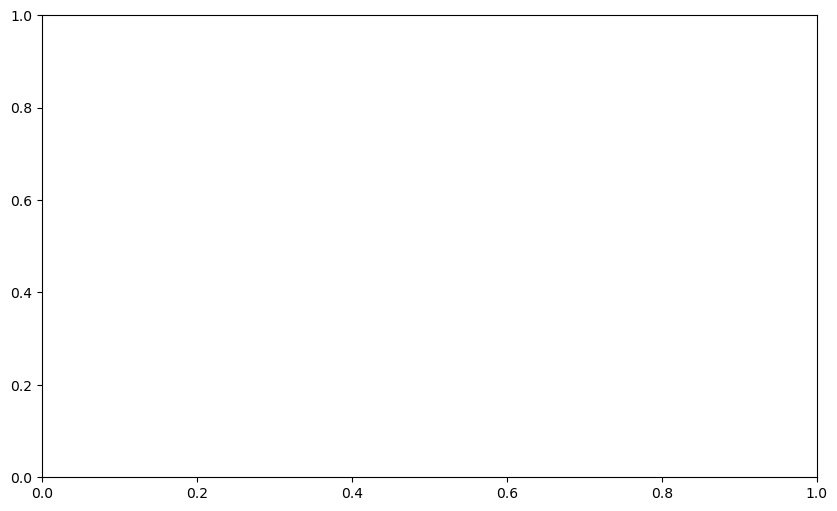

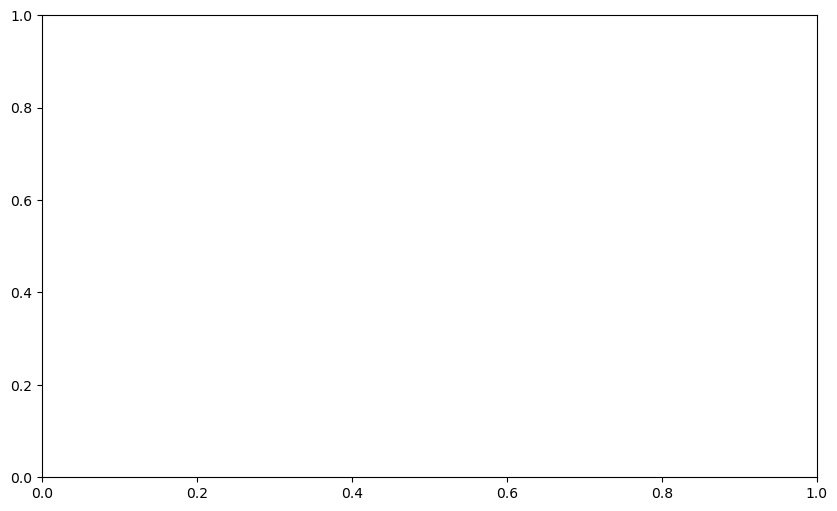

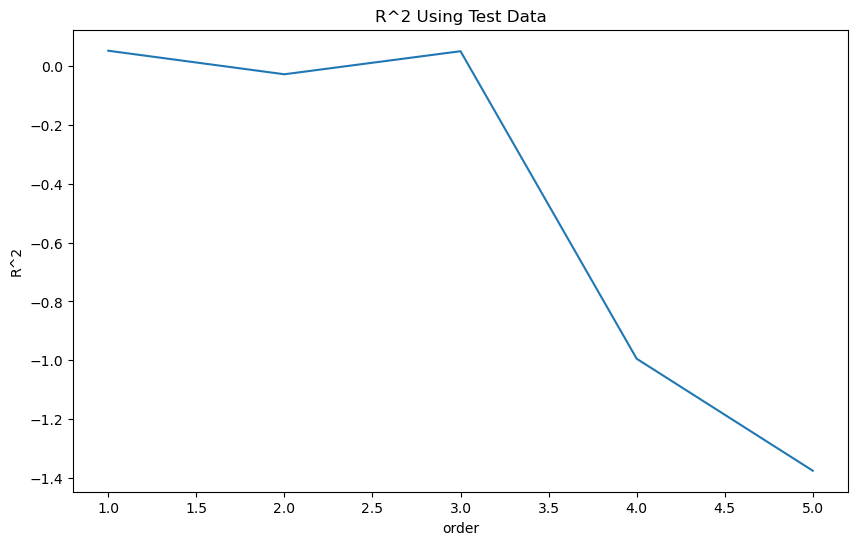

In [35]:
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.show()

## 3. Ridge Regression

Now consider that we have multiple features, i.e., 'CPU_frequency', 'RAM_GB', Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Let's create a polynomial feature model that uses all these parameters with degree = 2. Also create the training and testing attributes sets.

In [36]:
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr = pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])

Create a ridge regression model and evaluate it using values of the hyperparameter alpha ranging from 0.001 to 1 with increments of 0.001. Create a list of all Ridge Regression R^2 score for training and testing data. 

In [37]:
Rqsu_train = []
Rqsu_test = []
Alpha = np.arange(0.001, 1, 0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha = alpha)
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    pbar.set_postfix({'Test Score': test_score, 'Train Score': train_score})
    Rqsu_test.append(test_score)
    Rqsu_train.append(train_score)

100%|██████████| 999/999 [00:10<00:00, 96.41it/s, Test Score=0.423, Train Score=0.669] 


Plot the R^2 values for the training and testing sets with respect to the value of alpha

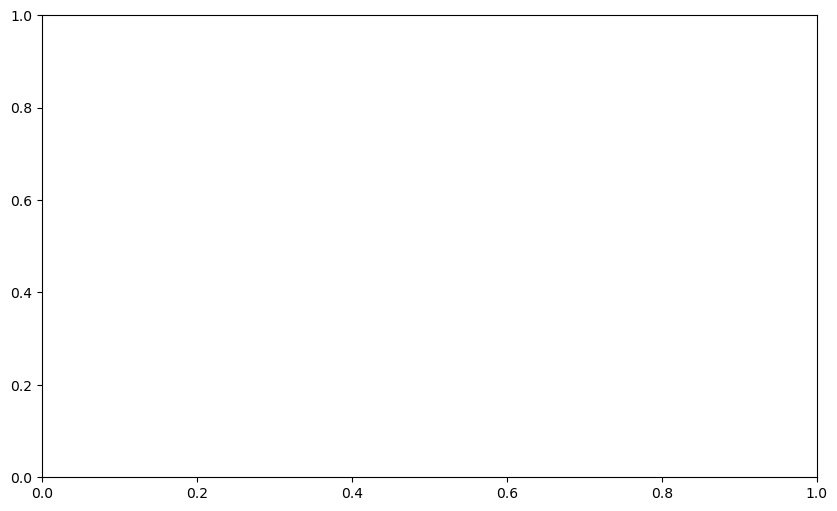

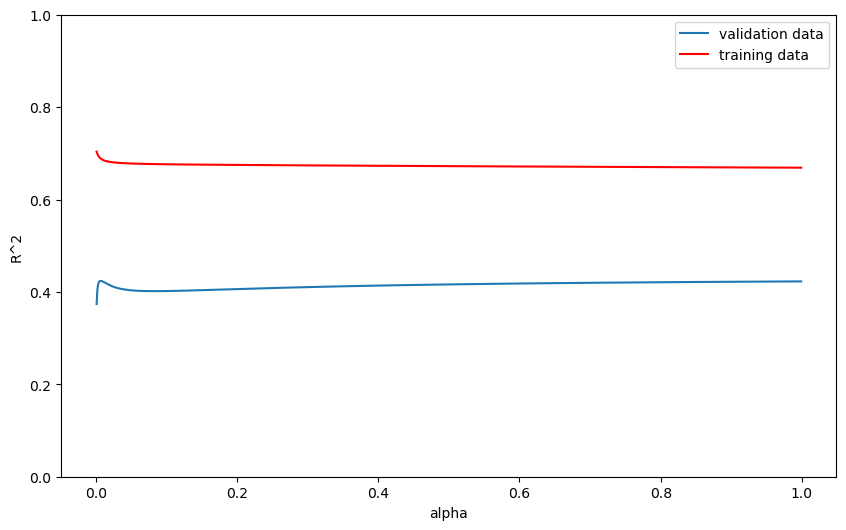

In [40]:
plt.figure(figsize = (10,6))
plt.plot(Alpha, Rqsu_test, label = 'validation data')
plt.plot(Alpha, Rqsu_train, 'r', label = 'training data')
plt.xlabel ('alpha')
plt.ylabel('R^2')
plt.ylim(0,1)
plt.legend()
plt.show()

## 4. Grid Search

Using the raw data and same set of feature used above, use GridSearchCV to identify the value of aplha for which the model performs best. Assume the set of alpha values to be used as {0.0001, 0.001, 0.01, 0.1, 1, 10}

In [41]:
parameters1 = [{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}]

let's create a Ridge instance and run Grid Search using a 4 fold cross validation.

In [42]:
RR = Ridge()
Grid1 = GridSearchCV(RR, parameters1, cv = 4)

In [43]:
#fit the grid search to the training data
Grid1.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

Let's create the R^2 score for the test data using the estimator that uses the derived optimum value of alpha.

In [44]:
BestRR = Grid1.best_estimator_
print(BestRR.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS','GPU', 'Category']], y_test))

0.300990504869182
